<h1> Objective:- Assessment Task 4: Problem solving task. </h1>

<div style="text-align: right"> Owner: <b>Karan Murjani </b> </div>

<h6> Importing all the required libraries </h6>

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier 
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,classification_report, silhouette_score, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import time

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

os.chdir('/Users/karanmurjani/Downloads/Study/Trimester 2/SIT720 - Machine Learning/Assignment 3/')

In [2]:
crm_df = pd.read_csv('Customer relationship marketing (CRM).csv')
print(crm_df.shape)
crm_df.head()

(9134, 20)


,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV
4,Washington,2813.692575,No,Basic,Bachelor,2/03/2011,Employed,M,43836,Rural,Single,73,12,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car


<h6> Data pre-processing - EDA </h6>

In [3]:
crm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      9134 non-null   object 
 1   Customer Lifetime Value    9134 non-null   float64
 2   Response                   9134 non-null   object 
 3   Coverage                   9134 non-null   object 
 4   Education                  9134 non-null   object 
 5   Effective To Date          9134 non-null   object 
 6   EmploymentStatus           9134 non-null   object 
 7   Gender                     9134 non-null   object 
 8   Income                     9134 non-null   int64  
 9   Location Code              9134 non-null   object 
 10  Marital Status             9134 non-null   object 
 11  Monthly Premium Auto       9134 non-null   int64  
 12  Months Since Last Claim    9134 non-null   int64  
 13  Number of Open Complaints  9134 non-null   int64

In [4]:
#Checking if there is any null values.
def check_missing(df):
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    missing_table = pd.concat([null_val, percent], axis=1)
    col = missing_table.rename(columns = {0 : 'Num', 1 : 'Rate'})
    return col

# Display columns missing values are under 1%.
print("Number of rows :- "+str(len(crm_df)))
cols = check_missing(crm_df)
cols.sort_values(by="Rate", ascending=False)

Number of rows :- 9134


,Num,Rate
State,0,0.0
Customer Lifetime Value,0,0.0
Total Claim Amount,0,0.0
Sales Channel,0,0.0
Renew Offer Type,0,0.0
Policy,0,0.0
Number of Policies,0,0.0
Number of Open Complaints,0,0.0
Months Since Last Claim,0,0.0
Monthly Premium Auto,0,0.0


In [5]:
cat_df = crm_df.select_dtypes(include='object')
print(cat_df.shape)
num_df = crm_df.select_dtypes(include=['float', 'int'])
print(num_df.shape)

(9134, 13)
(9134, 7)


<h6> EDA for Numerical variables

In [6]:
num_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,0,1,384.811147
1,6979.535903,0,94,13,0,8,1131.464935
2,12887.431650,48767,108,18,0,2,566.472247
3,7645.861827,0,106,18,0,7,529.881344
4,2813.692575,43836,73,12,0,1,138.130879


In [7]:
round(num_df.describe(), 2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,5.00,9.00,2893.24


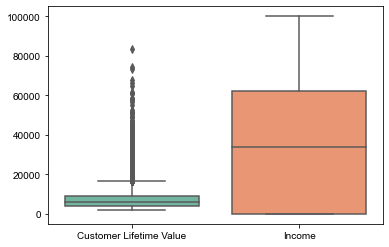

In [8]:
ax = sns.boxplot(data=num_df.iloc[:,:2], orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(12,10)})

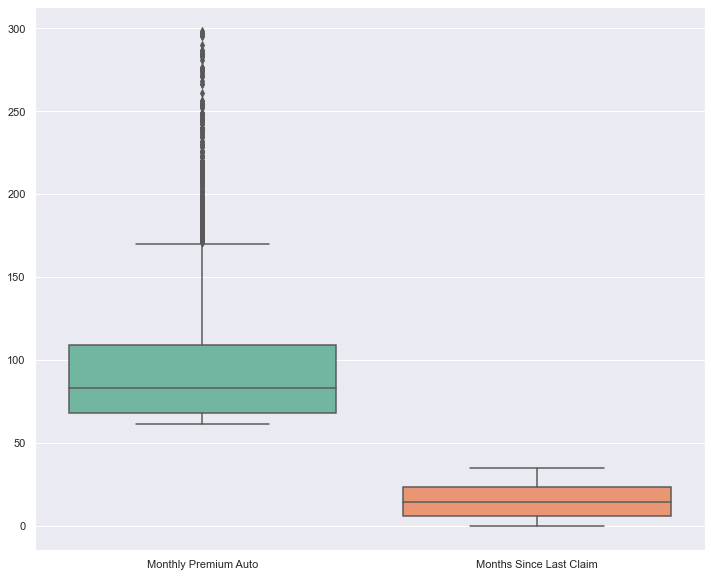

In [9]:
ax = sns.boxplot(data=num_df.iloc[:,2:4], orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(12,12)})

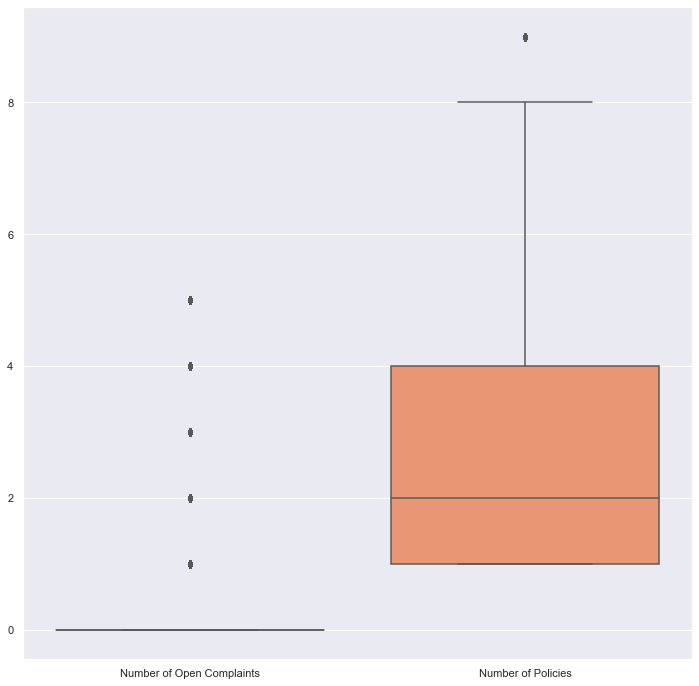

In [10]:
ax = sns.boxplot(data=num_df.iloc[:,4:6], orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(12,12)})

There seems to be outliers in most of them but for time being we will keep it as it is.

<AxesSubplot:>

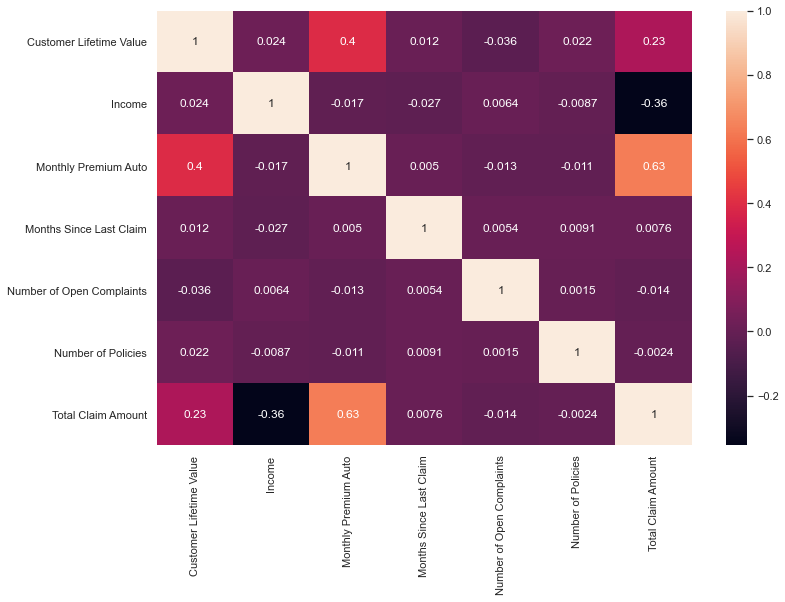

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(crm_df.corr(), annot=True)

There is no multicollinearity so we move ahead

<h6> Categorical variable treatment </h6>

In [12]:
cat_df.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV
4,Washington,No,Basic,Bachelor,2/03/2011,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car


In [13]:
#Converting into datetime column
cat_df['Effective To Date'] = pd.to_datetime(cat_df['Effective To Date'])
cat_df['Effective To Date'].dtypes

dtype('<M8[ns]')

In [14]:
print(cat_df['State'].value_counts())
print('-----------------------------------')
print(cat_df['Response'].value_counts())
print('-----------------------------------')
print(cat_df['Coverage'].value_counts())
print('-----------------------------------')
print(cat_df['Education'].value_counts())
print('-----------------------------------')
print(cat_df['EmploymentStatus'].value_counts())
print('-----------------------------------')
print(cat_df['Gender'].value_counts())
print('-----------------------------------')
print(cat_df['Location Code'].value_counts())
print('-----------------------------------')
print(cat_df['Marital Status'].value_counts())
print('-----------------------------------')
print(cat_df['Policy'].value_counts())
print('-----------------------------------')
print(cat_df['Renew Offer Type'].value_counts())
print('-----------------------------------')
print(cat_df['Sales Channel'].value_counts())
print('-----------------------------------')
print(cat_df['Vehicle Class'].value_counts())
print('-----------------------------------')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-----------------------------------
No     7826
Yes    1308
Name: Response, dtype: int64
-----------------------------------
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-----------------------------------
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-----------------------------------
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
-----------------------------------
F    4658
M    4476
Name: Gender, dtype: int64
-----------------------------------
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
-----------------------------------
Married     5298
Single      2467
Divorc

In [15]:
# Encode Categorical Columns
le = LabelEncoder()
le_cols = ['Coverage', 'Gender', 'Response']
ohe_cols = ['State', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 
            'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class']
cat_df1 = cat_df.copy()
cat_df1[le_cols] = cat_df1.loc[:, le_cols].apply(le.fit_transform) #Applying LabelEncoding
cat_df1 = pd.get_dummies(cat_df1, columns=ohe_cols) #Applying OneHot Enconding
print(cat_df1.shape)
cat_df1.head()

(9134, 48)


,Response,Coverage,Effective To Date,Gender,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,0,0,2011-02-24,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,1,2011-01-31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2,0,2,2011-02-19,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,2011-01-20,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,2011-02-03,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [16]:
print(cat_df1['Response'].value_counts())
print('-----------------------------------')
print(cat_df1['Coverage'].value_counts())
print('-----------------------------------')
print(cat_df1['Gender'].value_counts())

0    7826
1    1308
Name: Response, dtype: int64
-----------------------------------
0    5568
1    2742
2     824
Name: Coverage, dtype: int64
-----------------------------------
0    4658
1    4476
Name: Gender, dtype: int64


In [17]:
cat_df1['Effective To Date'].value_counts()
cat_df1['EffectiveDate_Month'] = cat_df1['Effective To Date'].dt.month
cat_df1['EffectiveDate_Day'] = cat_df1['Effective To Date'].dt.day
cat_df1.drop(columns=['Effective To Date'], inplace=True)
cat_df1.head()

,Response,Coverage,Gender,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,EffectiveDate_Month,EffectiveDate_Day
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,24
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,31
2,0,2,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,19
3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,20
4,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,3


In [18]:
final_df = pd.concat([num_df, cat_df1], axis=1)
print(num_df.shape)
print(cat_df1.shape)
print(final_df.shape)
final_df.head(1)

(9134, 7)
(9134, 49)
(9134, 56)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount,Response,Coverage,Gender,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,EffectiveDate_Month,EffectiveDate_Day
0,2763.519279,56274,69,32,0,1,384.811147,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,24


<h6> Scaling Data </h6>

In [19]:
#Applying Minmax scaling to numerical data
minmax_scaler = MinMaxScaler()
minmax_numerical = minmax_scaler.fit_transform(num_df) #Scaling Numerical df
minmax_cat = minmax_scaler.fit_transform(cat_df1.iloc[:,-2:]) #Scaling categorical df
scaled_num_df = pd.DataFrame(minmax_numerical, columns =num_df.columns)
scaled_cat_df = pd.DataFrame(minmax_cat, columns =cat_df1.iloc[:,-2:].columns)
print(scaled_num_df.shape)
print(scaled_cat_df.shape)
final_df = pd.concat([scaled_num_df, scaled_cat_df], axis=1)
final_df = pd.concat([final_df, cat_df1.iloc[:,:-2]], axis=1)
final_df = final_df.astype('float')
print(num_df.shape)
print(cat_df1.shape)
print(final_df.shape)
final_df.head(1)

(9134, 7)
(9134, 2)
(9134, 7)
(9134, 49)
(9134, 56)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount,EffectiveDate_Month,EffectiveDate_Day,Response,Coverage,Gender,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,0.010629,0.562847,0.033755,0.914286,0.0,0.0,0.132974,1.0,0.766667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<h3>
Q4. Analyse the importance of the features for predicting customer response using two different approaches. Explain the similarity/difference between outcomes. 

<h4> Feature Selection

<h6> 1) Correlation coefficient. - Selecting top 10 correlated values

In [20]:
# Finding correlation with the response variable
correlation = final_df.corr()['Response'].sort_values()

print('Top Positive Correlation:\n', correlation.tail(5))
print('------------------------------')
print('\n Top Negative Correlation:\n', correlation.head(5))
print('------------------------------')

Top Positive Correlation:
 Marital Status_Divorced     0.112042
Location Code_Suburban      0.116990
Renew Offer Type_Offer2     0.177504
EmploymentStatus_Retired    0.295645
Response                    1.000000
Name: Response, dtype: float64
------------------------------

 Top Negative Correlation:
 Renew Offer Type_Offer3       -0.150491
Renew Offer Type_Offer4       -0.145269
EmploymentStatus_Unemployed   -0.096111
Location Code_Urban           -0.073133
Location Code_Rural           -0.072621
Name: Response, dtype: float64
------------------------------


In [21]:
features = list(correlation.tail(6).index) + list(correlation.head(5).index)
temp_df = final_df[features]
temp_df.head()

,Sales Channel_Agent,Marital Status_Divorced,Location Code_Suburban,Renew Offer Type_Offer2,EmploymentStatus_Retired,Response,Renew Offer Type_Offer3,Renew Offer Type_Offer4,EmploymentStatus_Unemployed,Location Code_Urban,Location Code_Rural
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
#Dividing data into train-test split - Random.
X_train, X_test, y_train, y_test = train_test_split(temp_df.loc[:,temp_df.columns!="Response"], temp_df['Response'], 
                                                    test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

#Model with top 10 correlated features.
lgr_clf = LogisticRegression(solver='liblinear') 
lgr_clf.fit(X_train, y_train)
y_pred = lgr_clf.predict(X_test)
accuracy_lgr = round(accuracy_score(y_test, y_pred) * 100, 2)
print(np.unique(y_pred))

print('-------------------------------------------')
print('Logistic Regression model accuracy score: ', accuracy_lgr)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

(6393, 10)
(6393,)
(2741, 10)
(2741,)
[0. 1.]
-------------------------------------------
Logistic Regression model accuracy score:  87.09
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[2333   15]
 [ 339   54]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      2348
         1.0       0.78      0.14      0.23       393

    accuracy                           0.87      2741
   macro avg       0.83      0.57      0.58      2741
weighted avg       0.86      0.87      0.83      2741



There is no significant change in the accuracy but the complexity of model has reduced by a large margin. Earlier in our base model we had 55 features and after reducing into top 10 correlated features, the complexity has reduced without change in accuracy by large margin

<h6> 2) Recursive Feature Elimination

In [23]:
#Dividing data into train-test split - Random.
X_train, X_test, y_train, y_test = train_test_split(final_df.loc[:,final_df.columns!="Response"], final_df['Response'], 
                                                    test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

rfe = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy', min_features_to_select=5)
rfe = rfe.fit(X_train, y_train)
print('Optimal number of features :', rfe.n_features_)
print('Best features :', X_train.columns[rfe.support_])

(6393, 55)
(6393,)
(2741, 55)
(2741,)
Optimal number of features : 5
Best features : Index(['EmploymentStatus_Retired', 'Renew Offer Type_Offer1',
       'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3',
       'Renew Offer Type_Offer4'],
      dtype='object')


In [24]:
#Base model
lgr_clf = LogisticRegression(solver='liblinear') 
lgr_clf.fit(X_train, y_train)
y_pred = lgr_clf.predict(X_test)
accuracy_lgr = round(accuracy_score(y_test, y_pred) * 100, 2)
print(np.unique(y_pred))

print('-------------------------------------------')
print('Logistic Regression model accuracy score: ', accuracy_lgr)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

[0. 1.]
-------------------------------------------
Logistic Regression model accuracy score:  87.16
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[2326   22]
 [ 330   63]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      2348
         1.0       0.74      0.16      0.26       393

    accuracy                           0.87      2741
   macro avg       0.81      0.58      0.60      2741
weighted avg       0.86      0.87      0.83      2741



In [25]:
#Model after converting them to top 5 features obtained from RFE
X_train_rfe = rfe.transform(X_train) 
X_test_rfe = rfe.transform(X_test)

lgr_clf = LogisticRegression(solver='liblinear') #First instance without any parameters
lgr_clf.fit(X_train_rfe, y_train)
y_pred = lgr_clf.predict(X_test_rfe)
accuracy_lgr = round(accuracy_score(y_test, y_pred) * 100, 2)
print(np.unique(y_pred))

print('-------------------------------------------')
print('Logistic Regression model accuracy score: ', accuracy_lgr)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

[0. 1.]
-------------------------------------------
Logistic Regression model accuracy score:  87.09
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[2333   15]
 [ 339   54]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      2348
         1.0       0.78      0.14      0.23       393

    accuracy                           0.87      2741
   macro avg       0.83      0.57      0.58      2741
weighted avg       0.86      0.87      0.83      2741



There is no significant change in the accuracy but the complexity of model has reduced by a large margin. Earlier in our base model we had 55 features and after reducing into top 5 features the complexity has reduced without sacrificing the accuracy significantly.

<h6> 3) Select K Best Features - Univariate Selection

In [26]:
#Selection of top 10 features
kfeaures = SelectKBest(chi2, k=10).fit(final_df.loc[:,final_df.columns!="Response"], final_df['Response'])
kfeatures_df = pd.DataFrame({'Variables':list(final_df.loc[:,final_df.columns!="Response"].columns),
                                     'FeatureScore':kfeaures.scores_})
kfeatures_df.sort_values(by='FeatureScore', ascending=False).head(10)

,Variables,FeatureScore
24,EmploymentStatus_Retired,773.719458
42,Renew Offer Type_Offer2,195.600340
43,Renew Offer Type_Offer3,174.431886
44,Renew Offer Type_Offer4,171.146435
29,Marital Status_Divorced,97.477104
45,Sales Channel_Agent,66.229284
25,EmploymentStatus_Unemployed,62.971307
27,Location Code_Suburban,45.918524
28,Location Code_Urban,40.391460
26,Location Code_Rural,38.820111


Based on some threshold value we can pick features with high score and build a model on top of it which might reduce the complexity and even increase the accuracy.

# Q5. Create three supervised machine learning (ML) models except any ensemble approach for predicting customer response.

<h2> Modelling Part </h2>

In [27]:
#Dividing data into train-test split - Random.
X_train, X_test, y_train, y_test = train_test_split(final_df.loc[:,final_df.columns!="Response"], final_df['Response'], 
                                                    test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(6393, 55)
(6393,)
(2741, 55)
(2741,)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount,EffectiveDate_Month,EffectiveDate_Day,Coverage,Gender,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
7738,0.011416,0.000000,0.075949,0.857143,0.0,0.000,0.196569,1.0,0.566667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
181,0.184683,0.394185,0.658228,0.114286,0.4,0.375,0.388007,0.0,0.766667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7517,0.087248,0.761985,0.210970,0.657143,0.0,0.250,0.184126,1.0,0.200000,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1433,0.011400,0.651024,0.042194,0.800000,0.0,0.000,0.025542,0.0,0.366667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3849,0.138534,0.802522,0.198312,0.114286,0.0,0.125,0.268394,0.0,0.400000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<h6> 1) Logistic Regression </h6>

In [28]:
t0 = time.time() #Start timer
lgr_clf = LogisticRegression(solver='liblinear') #First instance without any parameters
lgr_clf.fit(X_train, y_train)
y_train_pred = lgr_clf.predict(X_train)
y_pred = lgr_clf.predict(X_test)
accuracy_lgr_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_lgr = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_lgr = round(f1_score(y_test, y_pred) * 100, 2)
recall_lgr = round(recall_score(y_test, y_pred) * 100, 2)
precision_lgr = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_lgr = round(roc_auc_score(y_test, y_pred) * 100, 2)
print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('Logistic Regression model Train accuracy score: ', accuracy_lgr_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('Logistic Regression model Test accuracy score: ', accuracy_lgr)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_lgr = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
Logistic Regression model Train accuracy score:  87.36
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[5419   59]
 [ 749  166]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      5478
         1.0       0.74      0.18      0.29       915

    accuracy                           0.87      6393
   macro avg       0.81      0.59      0.61      6393
weighted avg       0.86      0.87      0.84      6393

-------------------------------------------
Test Performance
-------------------------------------------
Logistic Regression model Test accuracy score:  87.16
-------------------------------------------
Confusion Matrix:- 
---------------------------------

<h6> 2) KNN Classifier </h6>

In [29]:
t0 = time.time() #Start timer
knn_clf = KNeighborsClassifier() #First instance without any parameters
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)
y_train_pred = knn_clf.predict(X_train)
accuracy_knn = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_knn = round(f1_score(y_test, y_pred) * 100, 2)
recall_knn = round(recall_score(y_test, y_pred) * 100, 2)
precision_knn = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_knn = round(roc_auc_score(y_test, y_pred) * 100, 2)

print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('KNN model Train accuracy score: ', accuracy_knn_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('KNN model Test accuracy score: ', accuracy_knn)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_knn = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
KNN model Train accuracy score:  95.51
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[5288  190]
 [  97  818]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      5478
         1.0       0.81      0.89      0.85       915

    accuracy                           0.96      6393
   macro avg       0.90      0.93      0.91      6393
weighted avg       0.96      0.96      0.96      6393

-------------------------------------------
Test Performance
-------------------------------------------
KNN model Test accuracy score:  91.61
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[2209  139]
 [  91  

<h6> 3) Support Vector Classifier(SVC) </h6>

In [30]:
t0 = time.time() #Start timer
svc_clf = SVC(random_state=100) #First instance with default parameters
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
y_train_pred = svc_clf.predict(X_train)
accuracy_svc_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_svc = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_svc = round(f1_score(y_test, y_pred) * 100, 2)
recall_svc = round(recall_score(y_test, y_pred) * 100, 2)
precision_svc = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_svc = round(roc_auc_score(y_test, y_pred) * 100, 2)
print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('SVC model Train accuracy score: ', accuracy_svc_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('SVC model Test accuracy score: ', accuracy_svc)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_svc = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
SVC model Train accuracy score:  88.46
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[5446   32]
 [ 706  209]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      5478
         1.0       0.87      0.23      0.36       915

    accuracy                           0.88      6393
   macro avg       0.88      0.61      0.65      6393
weighted avg       0.88      0.88      0.85      6393

-------------------------------------------
Test Performance
-------------------------------------------
SVC model Test accuracy score:  87.56
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[2332   16]
 [ 325  

<h3> Handling Imbalance class </h3>

<b> ---- Using Random resampling

In [31]:
# Separate majority and minority classes
df_majority = final_df.query('Response==0')
df_minority = final_df.query('Response==1')
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=7826,    # to make it 1:1 ratio
                                 random_state=123) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Response.value_counts()

0.0    7826
1.0    7826
Name: Response, dtype: int64

In [32]:
#Dividing data into train-test split.
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.loc[:,df_upsampled.columns!="Response"], df_upsampled['Response'], 
                                                    test_size=0.3, random_state=10)

<h6> 1) Logistic Regression

In [33]:
t0 = time.time() #Start timer
lgr_clf = LogisticRegression(solver='liblinear', random_state=100)
lgr_clf.fit(X_train, y_train)
y_train_pred = lgr_clf.predict(X_train)
y_pred = lgr_clf.predict(X_test)
accuracy_lgr_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_lgr_rsmp = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_lgr_rsmp = round(f1_score(y_test, y_pred) * 100, 2)
recall_lgr_rsmp = round(recall_score(y_test, y_pred) * 100, 2)
precision_lgr_rsmp = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_lgr_rsmp = round(roc_auc_score(y_test, y_pred) * 100, 2)


print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('Logistic Regression model Train accuracy score: ', accuracy_lgr_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('Logistic Regression model Test accuracy score: ', accuracy_lgr_rsmp)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_lgr_rsmp = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
Logistic Regression model Train accuracy score:  73.34
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[3788 1669]
 [1252 4247]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      5457
         1.0       0.72      0.77      0.74      5499

    accuracy                           0.73     10956
   macro avg       0.73      0.73      0.73     10956
weighted avg       0.73      0.73      0.73     10956

-------------------------------------------
Test Performance
-------------------------------------------
Logistic Regression model Test accuracy score:  73.04
-------------------------------------------
Confusion Matrix:- 
---------------------------------

<h6> 2) KNN Classifier 

In [34]:
t0 = time.time() #Start timer
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)
y_train_pred = knn_clf.predict(X_train)
accuracy_knn_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_knn_rsmp = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_knn_rsmp = round(f1_score(y_test, y_pred) * 100, 2)
recall_knn_rsmp = round(recall_score(y_test, y_pred) * 100, 2)
precision_knn_rsmp = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_knn_rsmp = round(roc_auc_score(y_test, y_pred) * 100, 2)


print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('KNN model Train accuracy score: ', accuracy_knn_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('KNN model Test accuracy score: ', accuracy_knn_rsmp)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_knn_rsmp = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
KNN model Train accuracy score:  90.35
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[4413 1044]
 [  13 5486]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89      5457
         1.0       0.84      1.00      0.91      5499

    accuracy                           0.90     10956
   macro avg       0.92      0.90      0.90     10956
weighted avg       0.92      0.90      0.90     10956

-------------------------------------------
Test Performance
-------------------------------------------
KNN model Test accuracy score:  86.82
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[1764  605]
 [  14 2

<h6> 3) Support Vector Classifier(SVC)

In [35]:
t0 = time.time() #Start timer
svc_clf = SVC(random_state=100)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
y_train_pred = svc_clf.predict(X_train)
accuracy_svc_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_svc_rsmp = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_svc_rsmp = round(f1_score(y_test, y_pred) * 100, 2)
recall_svc_rsmp = round(recall_score(y_test, y_pred) * 100, 2)
precision_svc_rsmp = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_svc_rsmp = round(roc_auc_score(y_test, y_pred) * 100, 2)


print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('SVC model Train accuracy score: ', accuracy_svc_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('SVC model Test accuracy score: ', accuracy_svc_rsmp)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_svc_rsmp = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
SVC model Train accuracy score:  94.97
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[4922  535]
 [  16 5483]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      5457
         1.0       0.91      1.00      0.95      5499

    accuracy                           0.95     10956
   macro avg       0.95      0.95      0.95     10956
weighted avg       0.95      0.95      0.95     10956

-------------------------------------------
Test Performance
-------------------------------------------
SVC model Test accuracy score:  92.61
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[2036  333]
 [  14 2

<b> --- Using SMOTE

In [36]:
sm = SMOTE(random_state=2) #Intialise

X_res, y_res = sm.fit_resample(final_df.loc[:,final_df.columns!="Response"], final_df['Response'])
y_res.value_counts()

0.0    7826
1.0    7826
Name: Response, dtype: int64

In [37]:
#Dividing data into train-test split.
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                    test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(10956, 55)
(10956,)
(4696, 55)
(4696,)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount,EffectiveDate_Month,EffectiveDate_Day,Coverage,Gender,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
352,0.008107,0.000000,0.046414,0.200000,0.0,0.000,0.119421,0.0,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6111,0.291992,0.665626,0.194093,0.142857,0.2,0.125,0.177489,1.0,0.466667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15512,0.010089,0.140327,0.046414,0.314286,0.0,0.000,0.119421,0.0,0.766667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.662473,0.0,0.0,0.337527,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
497,0.007678,0.000000,0.037975,0.571429,0.0,0.000,0.174171,0.0,0.966667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8748,0.214193,0.225863,0.000000,0.000000,0.0,0.125,0.101171,1.0,0.200000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


<h6> 1) Logistic Regression

In [38]:
t0 = time.time() #Start timer
lgr_clf = LogisticRegression(solver='liblinear', random_state=100)
lgr_clf.fit(X_train, y_train)
y_train_pred = lgr_clf.predict(X_train)
y_pred = lgr_clf.predict(X_test)
accuracy_lgr_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_lgr_smote = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_lgr_smote = round(f1_score(y_test, y_pred) * 100, 2)
recall_lgr_smote = round(recall_score(y_test, y_pred) * 100, 2)
precision_lgr_smote = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_lgr_smote = round(roc_auc_score(y_test, y_pred) * 100, 2)


print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('Logistic Regression model Train accuracy score: ', accuracy_lgr_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('Logistic Regression model Test accuracy score: ', accuracy_lgr_smote)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_lgr_smote = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
Logistic Regression model Train accuracy score:  73.81
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[3807 1665]
 [1204 4280]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      5472
         1.0       0.72      0.78      0.75      5484

    accuracy                           0.74     10956
   macro avg       0.74      0.74      0.74     10956
weighted avg       0.74      0.74      0.74     10956

-------------------------------------------
Test Performance
-------------------------------------------
Logistic Regression model Test accuracy score:  73.17
-------------------------------------------
Confusion Matrix:- 
---------------------------------

<h6> 2) KNN Classifier </h6>

In [39]:
t0 = time.time() #Start timer
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)
y_train_pred = svc_clf.predict(X_train)
accuracy_knn_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_knn_smote = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_knn_smote = round(f1_score(y_test, y_pred) * 100, 2)
recall_knn_smote = round(recall_score(y_test, y_pred) * 100, 2)
precision_knn_smote = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_knn_smote = round(roc_auc_score(y_test, y_pred) * 100, 2)


print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('KNN model Train accuracy score: ', accuracy_knn_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('KNN model Test accuracy score: ', accuracy_knn_smote)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_knn_smote = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
KNN model Train accuracy score:  94.55
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[4891  581]
 [  16 5468]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      5472
         1.0       0.90      1.00      0.95      5484

    accuracy                           0.95     10956
   macro avg       0.95      0.95      0.95     10956
weighted avg       0.95      0.95      0.95     10956

-------------------------------------------
Test Performance
-------------------------------------------
KNN model Test accuracy score:  85.92
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[1693  661]
 [   0 2

<h6> 3) Support Vector Machine </h6>

In [40]:
t0 = time.time() #Start timer
svc_clf = SVC(random_state=100)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
y_train_pred = svc_clf.predict(X_train)
accuracy_svc_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_svc_smote = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_svc_smote = round(f1_score(y_test, y_pred) * 100, 2)
recall_svc_smote = round(recall_score(y_test, y_pred) * 100, 2)
precision_svc_smote = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_svc_smote = round(roc_auc_score(y_test, y_pred) * 100, 2)


print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('SVC model Train accuracy score: ', accuracy_svc_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('SVC model Test accuracy score: ', accuracy_svc_smote)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_svc_smote = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
SVC model Train accuracy score:  96.9
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[5138  334]
 [   6 5478]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      5472
         1.0       0.94      1.00      0.97      5484

    accuracy                           0.97     10956
   macro avg       0.97      0.97      0.97     10956
weighted avg       0.97      0.97      0.97     10956

-------------------------------------------
Test Performance
-------------------------------------------
SVC model Test accuracy score:  94.59
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[2107  247]
 [   7 23

<h6> Hyperparameter tuning

In [41]:
#Dividing smote - upsampled data with stratified split

split = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
smote_df = pd.concat([X_res, y_res], axis=1)

for train_index, test_index in split.split(smote_df.loc[:,smote_df.columns!="Response"], smote_df['Response']):
    strat_train_set = smote_df.loc[train_index]
    strat_test_set = smote_df.loc[test_index]


print(strat_test_set.shape)
X_train = strat_train_set.loc[:,strat_train_set.columns!="Response"]
print(X_train.shape)
y_train = strat_train_set['Response']
print(y_train.shape)
print(strat_train_set.shape)
X_test = strat_test_set.loc[:,strat_test_set.columns!="Response"]
print(X_test.shape)
y_test = strat_test_set['Response']
print(y_test.shape)

(4696, 56)
(10956, 55)
(10956,)
(10956, 56)
(4696, 55)
(4696,)


<h6> 1) Logistic Regression

In [42]:
t0 = time.time() #Start timer
lgr_clf = LogisticRegression(solver='liblinear', random_state=100)
lgr_clf.fit(X_train, y_train)
y_train_pred = lgr_clf.predict(X_train)
y_pred = lgr_clf.predict(X_test)
accuracy_lgr_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_lgr_hyp = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_lgr_hyp = round(f1_score(y_test, y_pred) * 100, 2)
recall_lgr_hyp = round(recall_score(y_test, y_pred) * 100, 2)
precision_lgr_hyp = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_lgr_hyp = round(roc_auc_score(y_test, y_pred) * 100, 2)


print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('Logistic Regression model Train accuracy score: ', accuracy_lgr_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('Logistic Regression model Test accuracy score: ', accuracy_lgr_hyp)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_lgr_hyp = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
Logistic Regression model Train accuracy score:  73.99
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[3846 1632]
 [1218 4260]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      5478
         1.0       0.72      0.78      0.75      5478

    accuracy                           0.74     10956
   macro avg       0.74      0.74      0.74     10956
weighted avg       0.74      0.74      0.74     10956

-------------------------------------------
Test Performance
-------------------------------------------
Logistic Regression model Test accuracy score:  72.55
-------------------------------------------
Confusion Matrix:- 
---------------------------------

<h6> 2) KNN

We have commented following hyperparameter tuning as it takes longer time to run and we have directly used the best parameter obtained from it

In [43]:
#Hyperparameter tuning
knears_params = {"n_neighbors": list(range(2,8,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                 'weights':['uniform', 'distance', ]}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, cv=5, n_jobs=-1)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

print(f"Best parameters: {knears_neighbors}")

In [44]:
t0 = time.time() #Start timer
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)
y_train_pred = svc_clf.predict(X_train)
accuracy_knn_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_knn_hyp = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_knn_hyp = round(f1_score(y_test, y_pred) * 100, 2)
recall_knn_hyp = round(recall_score(y_test, y_pred) * 100, 2)
precision_knn_hyp = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_knn_hyp = round(roc_auc_score(y_test, y_pred) * 100, 2)


print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('KNN model Train accuracy score: ', accuracy_knn_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('KNN model Test accuracy score: ', accuracy_knn_hyp)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_knn_hyp = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
KNN model Train accuracy score:  96.38
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[5090  388]
 [   9 5469]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      5478
         1.0       0.93      1.00      0.96      5478

    accuracy                           0.96     10956
   macro avg       0.97      0.96      0.96     10956
weighted avg       0.97      0.96      0.96     10956

-------------------------------------------
Test Performance
-------------------------------------------
KNN model Test accuracy score:  93.33
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[2037  311]
 [   2 2

<h6> 3) Support Vector Classifier

We have commented following hyperparameter tuning as it takes longer time to run and we have directly used the best parameter obtained from it

In [45]:
# # Support Vector Classifier
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(X_train, y_train)
# svc_bestparam = grid_svc.best_estimator_

# print(f"Best parameters: {svc_bestparam}")

In [46]:
t0 = time.time() #Start timer
svc_clf = SVC(random_state=100, C=1, kernel='poly')
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
y_train_pred = svc_clf.predict(X_train)
accuracy_svc_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_svc_hyp = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_svc_hyp = round(f1_score(y_test, y_pred) * 100, 2)
recall_svc_hyp = round(recall_score(y_test, y_pred) * 100, 2)
precision_svc_hyp = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_svc_hyp = round(roc_auc_score(y_test, y_pred) * 100, 2)


print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('SVC model Train accuracy score: ', accuracy_svc_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('SVC model Test accuracy score: ', accuracy_svc_hyp)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_svc_hyp = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
SVC model Train accuracy score:  97.69
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[5227  251]
 [   2 5476]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      5478
         1.0       0.96      1.00      0.98      5478

    accuracy                           0.98     10956
   macro avg       0.98      0.98      0.98     10956
weighted avg       0.98      0.98      0.98     10956

-------------------------------------------
Test Performance
-------------------------------------------
SVC model Test accuracy score:  95.0
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[2114  234]
 [   1 23

In [47]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Logistic Regression - SMOTE', 'Logistic Regression - Resample', 
                    'Logistic Regression - Hyperparameter Tuning', 
                    'KNN', 'KNN - SMOTE', 'KNN - Resample', 
                    'KNN - Hyperparameter Tuning',
                    'SVC', 'SVC - SMOTE', 'SVC - Resample', 
                    'SVC - Hyperparameter Tuning'],
    'Time'        : [time_lgr, time_lgr_smote, time_lgr_rsmp, time_lgr_hyp,
                    time_knn, time_knn_smote, time_knn_rsmp, time_knn_hyp,
                    time_svc, time_svc_smote, time_svc_rsmp, time_svc_hyp],
    
    'Accuracy'    : [accuracy_lgr, accuracy_lgr_smote, accuracy_lgr_rsmp, accuracy_lgr_hyp,
                    accuracy_knn, accuracy_knn_smote, accuracy_knn_rsmp, accuracy_knn_hyp,
                    accuracy_svc, accuracy_svc_smote, accuracy_svc_rsmp, accuracy_svc_hyp],
    
    'Precision'   : [precision_lgr, precision_lgr_smote, precision_lgr_rsmp, precision_lgr_hyp,
                    precision_knn, precision_knn_smote, precision_knn_rsmp, precision_knn_hyp,
                    precision_svc, precision_svc_smote, precision_svc_rsmp, precision_svc_hyp],
    
    'Recall'      : [recall_lgr, recall_lgr_smote, recall_lgr_rsmp, recall_lgr_hyp, 
                    recall_knn, recall_knn_smote, recall_knn_rsmp, recall_knn_hyp, 
                    recall_svc, recall_svc_smote, recall_svc_rsmp, recall_svc_hyp],
    
    'F1_score'    : [f1score_lgr, f1score_lgr_smote, f1score_lgr_rsmp, f1score_lgr_hyp, 
                    f1score_knn, f1score_knn_smote, f1score_knn_rsmp, f1score_knn_hyp, 
                    f1score_svc, f1score_svc_smote, f1score_svc_rsmp, f1score_svc_hyp],

    'ROC_AUC'     : [rocauc_lgr, rocauc_lgr_smote, rocauc_lgr_rsmp, rocauc_lgr_hyp, 
                    rocauc_knn, rocauc_knn_smote, rocauc_knn_rsmp, rocauc_knn_hyp,
                    rocauc_svc, rocauc_svc_smote, rocauc_svc_rsmp, rocauc_svc_hyp],
    }, columns = ['Model', 'Time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'ROC_AUC'])

models_initial.sort_values(by='ROC_AUC', ascending=False)

,Model,Time,Accuracy,Precision,Recall,F1_score,ROC_AUC
11,SVC - Hyperparameter Tuning,5.159568,95.00,90.93,99.96,95.23,95.00
9,SVC - SMOTE,15.179779,94.59,90.43,99.70,94.84,94.60
7,KNN - Hyperparameter Tuning,8.040102,93.33,88.30,99.91,93.75,93.33
10,SVC - Resample,17.225957,92.61,87.41,99.40,93.02,92.67
6,KNN - Resample,3.545065,86.82,79.27,99.40,88.20,86.93
5,KNN - SMOTE,9.772840,85.92,77.99,100.00,87.63,85.96
4,KNN,1.248227,91.61,68.48,76.84,72.42,85.46
1,Logistic Regression - SMOTE,0.123538,73.17,71.02,78.05,74.37,73.18
2,Logistic Regression - Resample,0.121097,73.04,71.30,76.32,73.72,73.07
3,Logistic Regression - Hyperparameter Tuning,0.122467,72.55,70.58,77.34,73.81,72.55


# Q6. Build three ensemble models for predicting customer response.

In [48]:
# #Dividing data with stratified split.
split = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
smote_df = pd.concat([X_res, y_res], axis=1)

for train_index, test_index in split.split(final_df.loc[:,final_df.columns!="Response"], final_df['Response']):
    strat_train_set = final_df.loc[train_index]
    strat_test_set = final_df.loc[test_index]


print(strat_test_set.shape)
X_train = strat_train_set.loc[:,strat_train_set.columns!="Response"]
print(X_train.shape)
y_train = strat_train_set['Response']
print(y_train.shape)
print(strat_train_set.shape)
X_test = strat_test_set.loc[:,strat_test_set.columns!="Response"]
print(X_test.shape)
y_test = strat_test_set['Response']
print(y_test.shape)

(2741, 56)
(6393, 55)
(6393,)
(6393, 56)
(2741, 55)
(2741,)


<h6> 1) Random Forest Classifier

In [49]:
t0 = time.time() #Start timer
rfc_clf = RandomForestClassifier(random_state=100) #First instance with default parameters
rfc_clf.fit(X_train, y_train)
y_pred = rfc_clf.predict(X_test)
print(np.unique(y_pred))
accuracy_rfc = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_rfc = round(f1_score(y_test, y_pred) * 100, 2)
recall_rfc = round(recall_score(y_test, y_pred) * 100, 2)
precision_rfc = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_rfc = round(roc_auc_score(y_test, y_pred) * 100, 2)

print('-------------------------------------------')
print('Random Forest model accuracy score: ', accuracy_rfc)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))
t1 = time.time() #Stop timer
time_rfc = t1-t0

[0. 1.]
-------------------------------------------
Random Forest model accuracy score:  99.53
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[2345    3]
 [  10  383]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2348
         1.0       0.99      0.97      0.98       393

    accuracy                           1.00      2741
   macro avg       0.99      0.99      0.99      2741
weighted avg       1.00      1.00      1.00      2741



We have commented following hyperparameter tuning as it takes longer time to run and we have directly used the best parameter obtained from it

In [50]:
# #Parameter grid

# params = {
#     'n_estimators': [100, 200, 500],
#     'criterion': ['gini', 'entropy'],
#     'min_samples_split': [1,2,4,5],
#     'min_samples_leaf': [1,2,4,5],
#     'max_leaf_nodes': [4,10,20,50,None]
# }
# gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=5), scoring='roc_auc')
# gs1.fit(X_train, y_train)

# print('Best score:', gs1.best_score_)
# print('Best parameter:', gs1.best_params_)

In [51]:
t0 = time.time() #Start timer
rfc_clf = RandomForestClassifier(n_estimators=100, random_state=100, criterion='gini', max_leaf_nodes=None, min_samples_leaf=1, 
                       min_samples_split=2)                    
rfc_clf.fit(X_train, y_train)
y_pred = rfc_clf.predict(X_test)
y_train_pred = rfc_clf.predict(X_train)
accuracy_rfc_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_rfc_hyp = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_rfc_hyp = round(f1_score(y_test, y_pred) * 100, 2)
recall_rfc_hyp = round(recall_score(y_test, y_pred) * 100, 2)
precision_rfc_hyp = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_rfc_hyp = round(roc_auc_score(y_test, y_pred) * 100, 2)


print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('Random Forest model Train accuracy score: ', accuracy_rfc_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('Random Forest model Test accuracy score: ', accuracy_rfc_hyp)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_rfc_hyp = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
Random Forest model Train accuracy score:  100.0
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[5478    0]
 [   0  915]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5478
         1.0       1.00      1.00      1.00       915

    accuracy                           1.00      6393
   macro avg       1.00      1.00      1.00      6393
weighted avg       1.00      1.00      1.00      6393

-------------------------------------------
Test Performance
-------------------------------------------
Random Forest model Test accuracy score:  99.53
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[

<h6> 2) Extra Tree Classifier

In [52]:
t0 = time.time() #Start timer
ext_clf = ExtraTreesClassifier(random_state=100) #First instance with default parameters
ext_clf.fit(X_train, y_train)
y_pred = ext_clf.predict(X_test)
y_train_pred = ext_clf.predict(X_train)
accuracy_ext_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_ext = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_ext = round(f1_score(y_test, y_pred) * 100, 2)
recall_ext = round(recall_score(y_test, y_pred) * 100, 2)
precision_ext = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_ext = round(roc_auc_score(y_test, y_pred) * 100, 2)


print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('Extra Tree Classifier model Train accuracy score: ', accuracy_ext_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('Extra Tree Classifier model Test accuracy score: ', accuracy_ext)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_etc = t1-t0

[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
Extra Tree Classifier model Train accuracy score:  100.0
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[5478    0]
 [   0  915]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5478
         1.0       1.00      1.00      1.00       915

    accuracy                           1.00      6393
   macro avg       1.00      1.00      1.00      6393
weighted avg       1.00      1.00      1.00      6393

-------------------------------------------
Test Performance
-------------------------------------------
Extra Tree Classifier model Test accuracy score:  99.38
-------------------------------------------
Confusion Matrix:- 
-----------------------------

<h6> 3) XGBoost Classifier 

In [53]:
t0 = time.time() #Start timer
xgb_clf = XGBClassifier() #First instance with default parameters
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
y_train_pred = xgb_clf.predict(X_train)
accuracy_xgb_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
accuracy_xgb = round(accuracy_score(y_test, y_pred) * 100, 2)
f1score_xgb = round(f1_score(y_test, y_pred) * 100, 2)
recall_xgb = round(recall_score(y_test, y_pred) * 100, 2)
precision_xgb = round(precision_score(y_test, y_pred) * 100, 2)
rocauc_xgb = round(roc_auc_score(y_test, y_pred) * 100, 2)


print(np.unique(y_pred))

print('-------------------------------------------')
print('Train Performance')

print('-------------------------------------------')
print('Extra Tree Classifier model Train accuracy score: ', accuracy_xgb_train)
print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_train, y_train_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_train, y_train_pred))

print('-------------------------------------------')
print('Test Performance')

print('-------------------------------------------')
print('Extra Tree Classifier model Test accuracy score: ', accuracy_xgb)

print('-------------------------------------------')
print('Confusion Matrix:- ')
print('-------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------')
print('Classification Report:- ')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

print('-------------------------------------------------------')
print('ROC-AUC score:- ')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
t1 = time.time() #Stop timer
time_xgb = t1-t0

[20:56:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0. 1.]
-------------------------------------------
Train Performance
-------------------------------------------
Extra Tree Classifier model Train accuracy score:  100.0
-------------------------------------------
Confusion Matrix:- 
-------------------------------------------
[[5478    0]
 [   0  915]]
-------------------------------------------
Classification Report:- 
-------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5478
         1.0       1.00      1.00      1.00       915

    accuracy                           1.00      6393
  

In [54]:
# # XGBoost
# Not running this piece of code as this requires more time to run and our base model gives us good enough accuracy.
# params = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01,0.05,0.1],
#     'booster': ['gbtree', 'gblinear'],
#     'gamma': [0, 0.5, 1],
#     'reg_alpha': [0, 0.5, 1],
#     'reg_lambda': [0.5, 1, 5],
#     'base_score': [0.2, 0.5, 1]
# }

# gs2 = GridSearchCV(XGBClassifier(), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
# gs2.fit(X_train, y_train)

# print('Best score:', gs2.best_score_)
# print('Best score:', gs2.best_params_)

<h6> Model comparision </h6>

In [55]:
final_models = pd.DataFrame({
    'Model'       : [ 'Logistic Regression', 
                    'KNN',
                    'SVC',
                    'Random Forest Classifier', 
                    'Extra tree Classifier', 
                    'XGBoost Classifier'],
    'Time'        : [time_lgr_smote,
                    time_knn_hyp,
                    time_svc_hyp, 
                    time_rfc_hyp, 
                    time_etc, 
                    time_xgb],
    
    'Accuracy'    : [accuracy_lgr_smote,
                    accuracy_knn_hyp,
                    accuracy_svc_hyp, 
                    accuracy_rfc_hyp, 
                    accuracy_ext, 
                    accuracy_xgb],
    
    'Precision'   : [precision_lgr_smote,
                    precision_knn_hyp,
                    precision_svc_hyp, 
                    precision_rfc_hyp, 
                    precision_ext,
                    precision_xgb],
    
    'Recall'      : [recall_lgr_smote,
                    recall_knn_hyp, 
                    recall_svc_hyp, 
                    recall_rfc_hyp, 
                    recall_ext, 
                    recall_xgb],
    
    'F1_score'    : [f1score_lgr_smote, 
                    f1score_knn_hyp, 
                    f1score_svc_hyp, 
                    f1score_rfc_hyp, 
                    f1score_ext, 
                    f1score_xgb],

    'ROC_AUC'     : [rocauc_lgr_smote,
                    rocauc_knn_hyp,
                    rocauc_svc_hyp, 
                    rocauc_rfc_hyp, 
                    rocauc_ext, 
                    rocauc_xgb],
    
    }, columns = ['Model', 'Time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'ROC_AUC'])

final_models.sort_values(by='ROC_AUC', ascending=False)

,Model,Time,Accuracy,Precision,Recall,F1_score,ROC_AUC
5,XGBoost Classifier,0.588922,99.27,95.38,99.75,97.51,99.47
3,Random Forest Classifier,0.600734,99.53,99.22,97.46,98.33,98.66
4,Extra tree Classifier,0.525764,99.38,98.96,96.69,97.81,98.26
2,SVC,5.159568,95.00,90.93,99.96,95.23,95.00
1,KNN,8.040102,93.33,88.30,99.91,93.75,93.33
0,Logistic Regression,0.123538,73.17,71.02,78.05,74.37,73.18


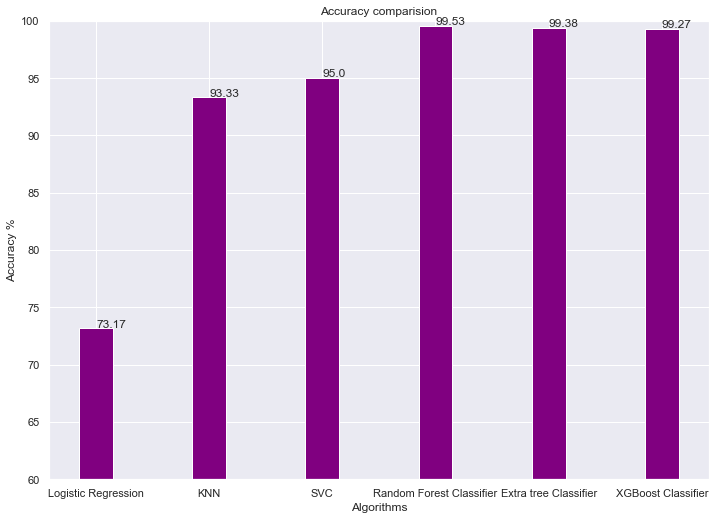

In [56]:
#Accuracy plot

fig, ax = plt.subplots(figsize = (10,7))
ax.bar(final_models['Model'],final_models['Accuracy'],width=0.3, color='purple')
for index,data in enumerate(final_models['Accuracy']):
    plt.text(x=index, y =data+0.1 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.tight_layout()
plt.xlabel('Algorithms')
plt.ylabel('Accuracy %')
plt.title('Accuracy comparision')
plt.ylim([60,100])
plt.show()

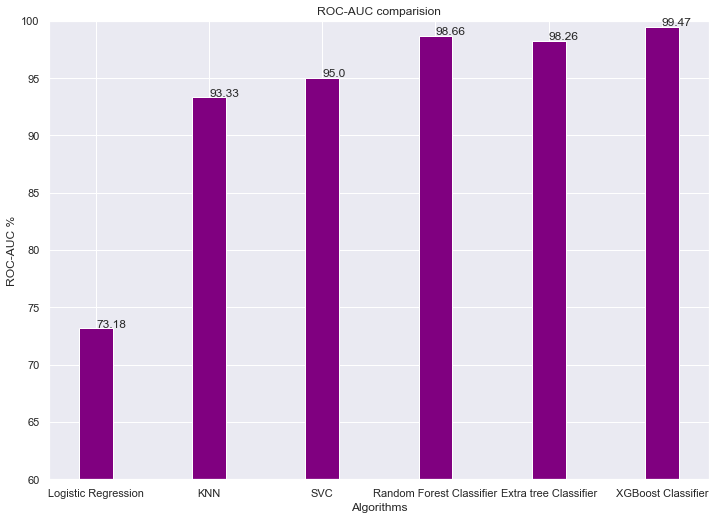

In [57]:
#ROC-AUC plot

fig, ax = plt.subplots(figsize = (10,7))
ax.bar(final_models['Model'],final_models['ROC_AUC'],width=0.3, color='purple')
for index,data in enumerate(final_models['ROC_AUC']):
    plt.text(x=index, y =data+0.1 , s=f"{data}" , fontdict=dict(fontsize=12))
plt.tight_layout()
plt.xlabel('Algorithms')
plt.ylabel('ROC-AUC %')
plt.title('ROC-AUC comparision')
plt.ylim([60,100])
plt.show()

![Alt Text](https://tenor.com/view/louis-ck-i-did-it-success-victory-yes-gif-4990206.gif)